# <font color='SEAGREEN'>Day 5</font>
## <font color='SEAGREEN'>KNN and Evaluation</font>
<font color='orange'> You have finished the first week of your project. We guided you through every step and provided sample code snippets. This week, we will provide the links to Python documentations and connect you to the right resource, but you will rely on your effort to understand the functions and write the code. The skill of understanding Python documentations is invaluable and makes you an independant coder.Try your best to answer all the questions on your own. Feel free to explore the examples provided by scikit-learn and other online resources. Ask your instructor for help if you got stuck.
    


### Applying KNN on the Disaster Dataset
Apply the KNN that you implemented on Day4 on the help/nothelp dataset and report your accuracy.

<font color='blue'> Show your work to the instructor if you finished the Advanced Excercise of Day4, then move to Implementing KNN using Scikit-Learn. Otherwise complete the following section before moving to Implementing KNN using Scikit-Learn. </font>


In [4]:
# Your code
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import operator 
import math
import operator
import statistics 
from statistics import mode

help_tweets = []

nothelp_tweets = []

for line in open("help.txt", 'r', encoding = 'utf-8'):
        help_tweets.append(line)
        
for line in open("nothelp.txt", 'r', encoding = 'utf-8'):
        nothelp_tweets.append(line)
    
    
all_text = help_tweets + nothelp_tweets

n_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(all_text)

n_components = 10
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)


def euclideanDistance(instance1, instance2):
    sum = 0
    for x in range (0, len(instance1)):
        difference = (instance1[x] - instance2[x])**2
        sum += difference
    distance = math.sqrt(sum)
    return distance

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    for x in range(len(trainingSet)):
        d = euclideanDistance(trainingSet[x], testInstance)
        coordinate = (x, d)
        distances.append(coordinate)
    distances.sort(key=operator.itemgetter(1))
    neighbors = distances[:k]
    return neighbors
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
tf_feature_names = tf_vectorizer.get_feature_names()
help_features = []
nothelp_features = []

tf = tf_vectorizer.fit(all_text)

for i in help_tweets:
    x = tf.transform([i])
    x = lda.transform(x)
    help_features.append(list(x[0]))

for i in nothelp_tweets:
    x = tf.transform([i])
    x = lda.transform(x)
    nothelp_features.append(list(x[0]))
    
X = []
y = []
for tweet in help_features:
    X.append(tweet)
    y.append(1)
for tweet in nothelp_features:
    X.append(tweet)
    y.append(0)

X, y = X, y

# X train is the training set and X test labels the training set, y train is the test set and y test labels the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)


def predictLabel(neighbors, y_train):
    labels = []
    for x in range(len(neighbors)):
        element = neighbors[x][0]
        labels.append(y_train[element])
    mostLabel = mode(labels)
    return(mostLabel)

def getAccuracy(y, y_pred):
    equal = 0
    for x in range(len(y)):
        if y_pred[x] == y[x]:
            equal += 1
    accuracy = (equal/ len(y))*100
    return accuracy 
yy = []
for i in range(len(X_test)):
    neighbors = getNeighbors(X_train, X_test[i], 1)
    yy.append(predictLabel(neighbors, y_train))
    
getAccuracy(y_test, yy)



89.4431554524362

# Implementing KNN using Scikit-Learn
Read [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) of KNN implemented in Scikit-Learn, work trough the example on the bottom of the documentation page and also [this example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py), and apply KNeighborsClassifier on your data (X_train). Report the accuracy on X_test.

In [5]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 15)
neigh.fit(X_train, y_train) 

y_predi = []

for i in range(len(X_test)):
    y_predi.append(neigh.predict([X_test[i]]))

print(getAccuracy(y_test,y_predi))

93.85150812064965


<font color='blue'> Did you get a different accuracy in comparison to you own implementation of KNN?

Replace the accuracy function that you implemented on Day4 with [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). Now report the accuracy of your classifier implemented using Scikit-Learn. You should get the same accuracy score (+- 1%).

In [6]:
# Your code here
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi)*100




93.85150812064965

## Evaluation Metrics
There are many metrics available for evaluating the performance of a classifer. Some of the most common metrics are: Accuracy, Precision, Recall, and F1 score.
- Accuracy: the fraction of correct predictions. See [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
- Precision: the precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. See [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
-  Recall: the recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. See [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).
- F1 score: the F1 score is also known as balanced F-score or F-measure. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. See [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score). The formula for the F1 score is:

$$F1 = \frac{2*Precision*Recall}{Precision+Recall}$$


#### Implement Accuracy, Precision, Recall, and F1 score. Then calculate these metrics for the example bellow.

In [7]:
y_true = [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0]
y_pred_example = [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]

In [8]:
# Copy your implementation of Accuracy from Day4 here and calculate it for the example above.

def getAccuracy(y_test, y_pred):
    equal = 0
    for x in range(len(y_test)):
        if y_pred[x] == y_test[x]:
            equal += 1
    accuracy = (equal/ len(y_test))*100
    return accuracy 
y_pred = []
for i in X_test:
    neighbors = getNeighbors(X_train, i, 1)
    y_pred.append(predictLabel(neighbors, y_train))
    
getAccuracy(y_true, y_pred_example)


66.66666666666666

In [9]:
# Use sckit-learn to find accuracy, the values from the two methods must be the same.

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred_example)*100


66.66666666666666

In [10]:
# Implement Precision for a two-class classification and calculate it for the example above.\

from sklearn.metrics import precision_score

precision_score(y_true, y_pred_example)  



0.75

In [11]:
# Use sckit-learn to find precision, the values from the two methods must be the same.
from sklearn.metrics import precision_score

precision_score(y_true, y_pred_example)  

0.75

In [12]:
# Implement Recall for a two-class classification and calculate it for the example above.
from sklearn.metrics import recall_score
recall_score(y_true, y_pred_example)  


0.5

In [13]:
# Use sckit-learn to find Recall, the values from the two methods must be the same.
from sklearn.metrics import recall_score
recall_score(y_true, y_pred_example)  

0.5

In [14]:
# Implement F1 score for a two-class classification and calculate it for the example above.
from sklearn.metrics import f1_score
f1_score(y_true, y_pred_example)  



0.6

In [15]:
# Use sckit-learn to find F1 score, the values from the two methods must be the same.
from sklearn.metrics import f1_score
f1_score(y_true, y_pred_example)  


0.6

### Visualizing your results
In KNN, as we change the value of k (the number of classes), our evaluation metrics change. You have observed that in the Iris dataset, we achieved the highest accuracy when using k=2. You find the best value of k by manaully changing k and observing the accuracy. What if we want to do this task automatically and find the k that best fits our datset. This process is an example of tuning parameters.

In [17]:
# Write a piece of code that changes k and calculates each metric.
# k = [1, 3, 5, 7, 9, 10, 20, 30, 40, 50] Do NOT hardcode these values; use for loops and range() function.
# Store Accuracy, Precision, Recall, and F1 values in acc, p, r, f1 lists. 

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

k = [1, 3, 5, 7, 9, 10, 20, 30, 40, 50]
acc = []
p = []
r = []
f1 = []
for x in k:
    neigh = KNeighborsClassifier(n_neighbors = x)
    neigh.fit(X_train, y_train) 
    predicted = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, predicted))
    p.append(precision_score(y_test, predicted))
    r.append(recall_score(y_test, predicted))
    f1.append(f1_score(y_test, predicted))
print(" accuracy", acc)
print()
print("precision score", p)
print()
print("recall", r)
print()
print("F1", f1)

 accuracy [0.894431554524362, 0.9245939675174014, 0.9361948955916474, 0.9361948955916474, 0.9373549883990719, 0.9385150812064965, 0.9408352668213457, 0.9408352668213457, 0.9408352668213457, 0.9408352668213457]

precision score [0.1875, 0.15, 0.25, 0.16666666666666666, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0]

recall [0.23529411764705882, 0.058823529411764705, 0.0392156862745098, 0.0196078431372549, 0.0196078431372549, 0.0, 0.0, 0.0, 0.0, 0.0]

F1 [0.20869565217391303, 0.08450704225352114, 0.06779661016949153, 0.03508771929824561, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Plotting your results
For each of the evaluation metrics, generate a scatter or line plot. X axis will be k and y axis will be the value of your metric for the corresponding k. Read the documentation [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). There are illustrative examples on the bottom the documentation page.

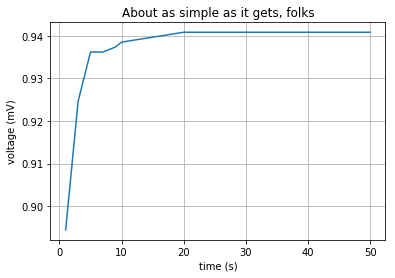

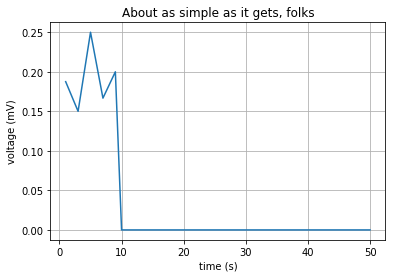

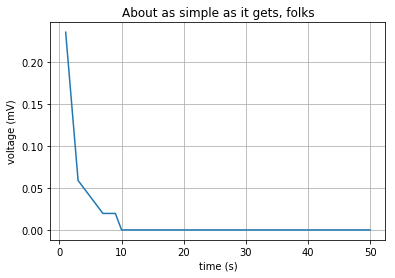

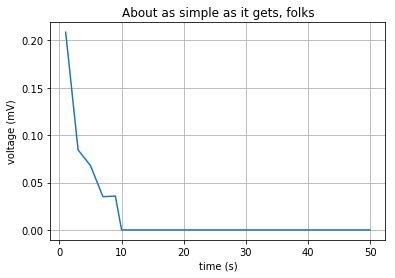

In [78]:
# Your code here

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = k
s = acc
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()


t = k
s = p

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()


# Data for plotting
t = k
s = r

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

# Data for plotting
t = k
s = f1
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [65]:
# Based on the plots above, what is the best value of k for the help/nothelp dataset? Why?

4 is the best 

### Advanced Exercise - ROC curve

Read about ROC curve online and answer these questions ([this article](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0) provides a good explanation):
- What is an ROC curve?
- What is the area under the ROC curve (ROC-AUC)?
- Do we look for high ROC-AUC or low?
- What is the min value for an acceptable classifier?

#### Implement ROC-AUC
You cannot use scikit-learn in your implementation but you can use it to make sure you are getting the right value. plot the ROC curve for help/nothelp dataset and print the ROC-AUC value.

In [1]:
# Your code
# ROC-AUC for your dataset is 0.63 when k=2

import numpy as np
import matplotlib.pyplot as plt
def pdf(x, std, mean):
    cons = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = const*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist
x = np.linspace(0, 1, num=100)
good_pdf = pdf(x,0.1,0.4)
bad_pdf = pdf(x,0.1,0.6)
def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="bad")', fontsize=12)
    ax.legend(["good","bad"])
    fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

NameError: name 'const' is not defined

In [ ]:



















































































































































































































































































































































































































































...................................................................................................................................................................................................................................................
































































































































































































































































































































































































































































































































































































































































































































































